In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from pathlib import Path
from glob import glob
import open3d as o3d
import numpy as np
from pcd_utils import load_ply_scene, filter_by_object, filter_by_class, voxelize_point_cloud, crop_point_cloud

BASE_PATH = Path("/home/SE3D/SE3D/datasets/scannet/")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
# Get all downloaded scene names
# All scenes might have more than one scan, but we want unique scenes, so only take the one with "_00"
scan_paths = glob(str(BASE_PATH) + "/scans/scene*/*_vh_clean_2.labels.ply")
scan_names = ["_".join(e.split("/")[-1].split("_")[:1]) for e in scan_paths]
scan_names = set(scan_names)
scan_names = list(scan_names)
scan_names = [e + "_00" for e in scan_names]

In [5]:
# Load point cloud
from open3d.web_visualizer import draw

point_cloud, class_ids, object_classes, vertices_classes, vertices_objects = load_ply_scene(BASE_PATH, scan_names[1])
draw(point_cloud)

[Open3D INFO] Resetting default logger to print to terminal.
[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: ["stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"]
FEngine (64 bits) created at 0x7f5574c90010 (threading is enabled)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.
EGL(1.5)
OpenGL(4.1)


WebVisualizer(window_uid='window_0')

[Open3D INFO] Sending init frames to window_0.


In [ ]:
# Filter point cloud for class "chair"
filtered_point_cloud = filter_by_class(point_cloud, vertices_classes, class_ids, "chair")
draw(filtered_point_cloud)

In [5]:
# Find all objects ids of class
filter_classname = "chair"

searchclass_objects = [idx for idx, classid in enumerate(object_classes) if class_ids[filter_classname] == classid]

In [ ]:
# Filter point cloud for first chair
filtered_point_cloud = filter_by_object(point_cloud, vertices_objects, searchclass_objects[1])
draw(filtered_point_cloud)

In [11]:
# Find bounds of object and crop point cloud
vertices = np.asarray(filtered_point_cloud.points)
min_bound = np.min(vertices, axis=0)
max_bound = np.max(vertices, axis=0)

cropped_point_cloud = crop_point_cloud(point_cloud, min_bound, max_bound)
draw(cropped_point_cloud)

[Open3D INFO] Window window_7 created.


WebVisualizer(window_uid='window_7')

[Open3D INFO] Sending init frames to window_7.


[058:308][3482421] (stun_port.cc:96): Binding request timed out from 10.79.23.x:35935 (eno1)


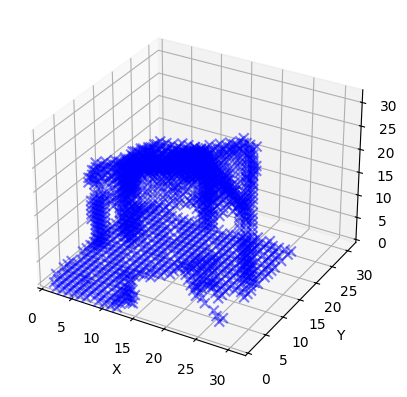

In [17]:
import matplotlib.pyplot as plt
# Voxelize filtered point cloud and show
voxelized = voxelize_point_cloud(cropped_point_cloud)

# Show np voxel grid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the indices of non-zero elements (where the voxel is present)
x, y, z = np.where((voxelized).astype(np.uint8))  # sample["image"][0]

# Plot the voxels
ax.scatter(x, y, z, marker='x', s=50, c='b', alpha=0.5)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,32)
ax.set_ylim(0,32)
ax.set_zlim(0,32)

# Show the plot
plt.show()